In [1]:
import cv2

In [2]:
cv2.__version__

'4.0.1'

In [5]:
img = cv2.imread(r'C:\Users\Pablo\Desktop\STRIVE AI\Strive_course\Chapter 3-DL\Untitled Folder\dog.png')

In [7]:
cv2.imshow('My image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

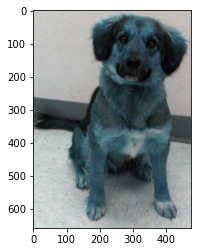

In [11]:
plt.imshow(img)

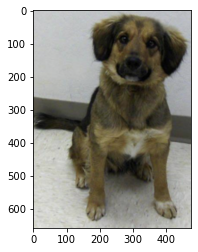

In [13]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

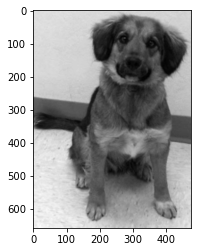

In [16]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

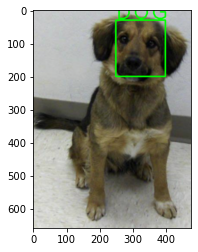

In [23]:
img_copy = rgb_img.copy()
cv2.rectangle(img_copy, (250,30),(400,200),(0,255,0),4)
cv2.putText(img_copy, 'DOG', (250,30), cv2.FONT_HERSHEY_PLAIN, 5, (0,255,0),3)
plt.imshow(img_copy)

True

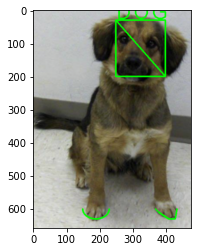

In [45]:
import numpy as np
img_copy = rgb_img.copy()
cv2.rectangle(img_copy, (250,30),(400,200),(0,255,0),4)
cv2.putText(img_copy, 'DOG', (250,30), cv2.FONT_HERSHEY_PLAIN, 5, (0,255,0),3)
#image = cv2.line(image, start_point, end_point, color, thickness)
cv2.line(img_copy, (250,30),(400,200),(0,255,0),4)
#image = cv2.ellipse(image, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness)
cv2.ellipse(img_copy, (190,600), (40,30), 180, 180, 360, (0,255,0), 3)
#image = cv2.polylines(image, [pts], isClosed, color, thickness)
pts = np.array([[370, 600], [380, 610], 
                [410, 630], [430, 630], [435, 600]],
               np.int32)
cv2.polylines(img_copy, [pts], False, (0,255,0), 3)
plt.imshow(img_copy)

cv2.imwrite('dog_anotado.png', cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR))

In [47]:
R, G, B = cv2.split(rgb_img)

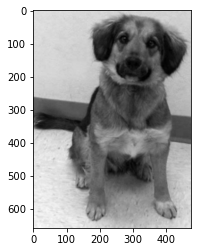

In [48]:
plt.imshow(R, cmap='gray')

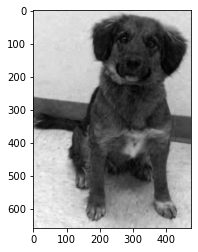

In [50]:
plt.imshow(B, cmap='gray')

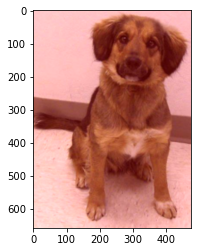

In [52]:
R_increased = cv2.add(R, 75)
img_red = cv2.merge([R_increased,G,B])
plt.imshow(img_red)

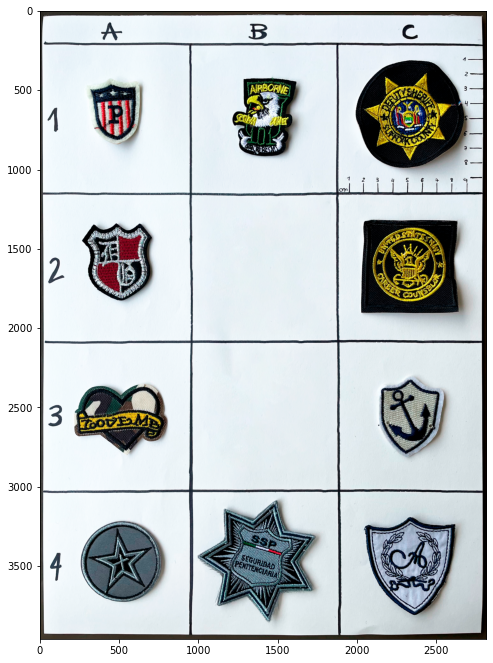

In [57]:
bgr_army = cv2.imread(r'C:\Users\Pablo\Desktop\STRIVE AI\Strive_course\Chapter 3-DL\Untitled Folder\Army.png')
rgb_army = cv2.cvtColor(bgr_army, cv2.COLOR_BGR2RGB)
hsv_army = cv2.cvtColor(bgr_army, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(8,12))
plt.imshow(rgb_army)

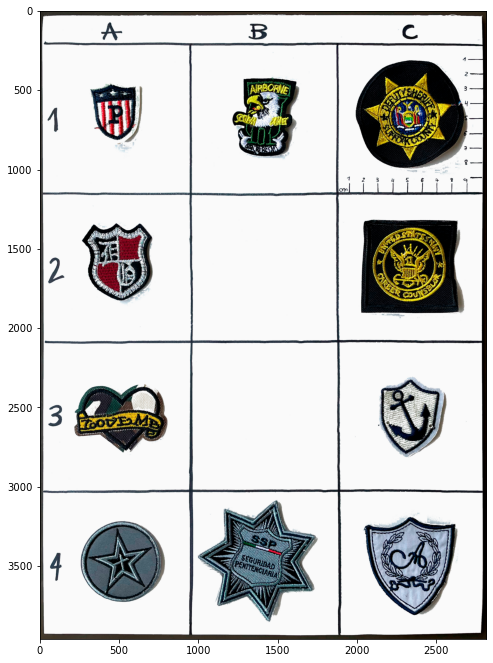

In [131]:
lower_bounds = (0,0,150)
upper_bounds = (180,25,255)
mask_army = cv2.inRange(hsv_army, lower_bounds, upper_bounds)
masked_army = bgr_army.copy()
masked_army[mask_army!=0] = [250,250,250]
#plt.imshow(mask_army, cmap='gray')
plt.figure(figsize=(8,12))
plt.imshow(cv2.cvtColor(masked_army, cv2.COLOR_BGR2RGB))

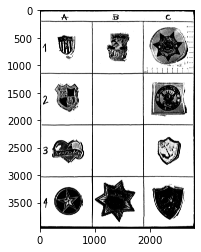

In [116]:
plt.imshow(mask_army, cmap='gray')

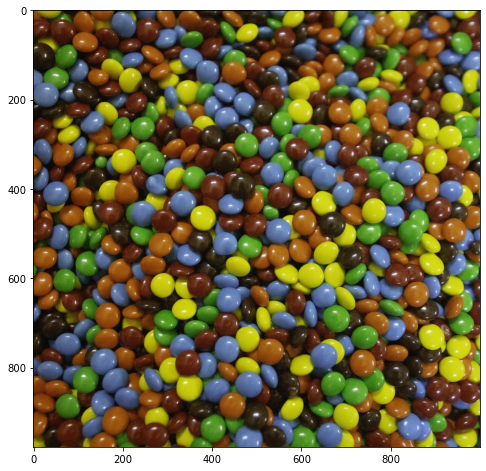

In [107]:
bgr_mms = cv2.imread(r'C:\Users\Pablo\Desktop\STRIVE AI\Strive_course\Chapter 3-DL\Untitled Folder\m&ms.jpg')
rgb_mms = cv2.cvtColor(bgr_mms, cv2.COLOR_BGR2RGB)
hsv_mms = cv2.cvtColor(bgr_mms, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(8,12))
plt.imshow(rgb_mms)

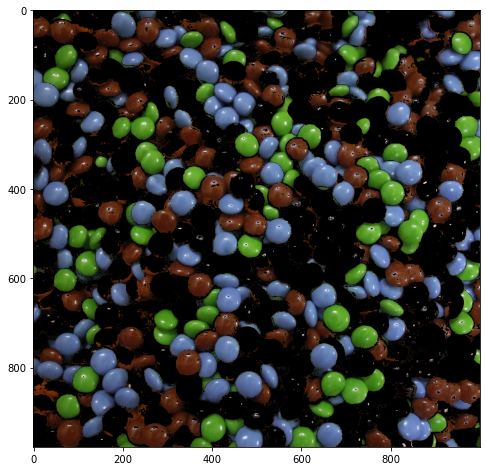

In [161]:
green_lower_bounds = (40,0,0)
green_upper_bounds = (75,255,255)
mask_green_mms = cv2.inRange(hsv_mms, green_lower_bounds, green_upper_bounds)
blue_lower_bounds = (95,15,0)
blue_upper_bounds = (135,255,255)
mask_blue_mms = cv2.inRange(hsv_mms, blue_lower_bounds, blue_upper_bounds)
red_lower_bounds = (12,0,0)
red_upper_bounds = (160,255,255)
mask_red_mms = cv2.inRange(hsv_mms, red_lower_bounds, red_upper_bounds)
mms = bgr_mms.copy()
mms[(mask_blue_mms==0) & (mask_green_mms==0) & (mask_red_mms!=0)] = [0,0,0]
#plt.imshow(mask_army, cmap='gray')
plt.figure(figsize=(8,12))
plt.imshow(cv2.cvtColor(mms, cv2.COLOR_BGR2RGB))

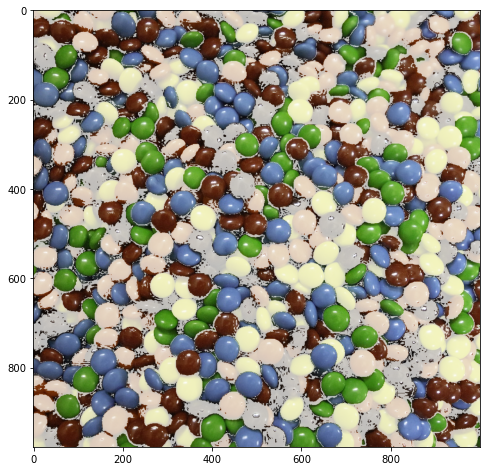

In [178]:
mms = bgr_mms.copy()
mms = cv2.cvtColor(mms, cv2.COLOR_BGR2RGBA)
final_mask = (mask_blue_mms==0) & (mask_green_mms==0) & (mask_red_mms!=0)
for i in range(mms.shape[0]):
    for j in range(mms.shape[1]):
        if final_mask[i][j]:
            mms[i][j][3]=70
plt.figure(figsize=(8,12))
plt.imshow(mms)